<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [38]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [39]:
data = pd.read_csv('data/job_listings.csv')
data.columns

Index(['Unnamed: 0', 'description', 'title'], dtype='object')

In [40]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()


,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [41]:
data_ = data['description'].astype(str)
data['description']

0      b"<div><div>Job Requirements:</div><ul><li><p>...
1      b'<div>Job Description<br/>\n<br/>\n<p>As a Da...
2      b'<div><p>As a Data Scientist you will be work...
3      b'<div class="jobsearch-JobMetadataHeader icl-...
4      b'<ul><li>Location: USA \xe2\x80\x93 multiple ...
                             ...                        
421    b"<b>About Us:</b><br/>\nWant to be part of a ...
422    b'<div class="jobsearch-JobMetadataHeader icl-...
423    b'<div class="jobsearch-JobMetadataHeader icl-...
424    b"<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...
425    b'<div></div><div><div><div><div><p>Cerner Int...
Name: description, Length: 426, dtype: object

In [42]:
from bs4 import BeautifulSoup as BS
import requests

    
soup = [BS(ad, "html.parser") for ad in data['description']]

data['clean_text'] = [text.get_text() for text in soup]

data.head()

,description,title,clean_text
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...


## 2) Use Spacy to tokenize the listings 

In [43]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [181]:
data['clean_text']

0      b"Job Requirements:\nConceptual understanding ...
1      b'Job Description\n\nAs a Data Scientist 1, yo...
2      b'As a Data Scientist you will be working on c...
3      b'$4,969 - $6,756 a monthContractUnder the gen...
4      b'Location: USA \xe2\x80\x93 multiple location...
                             ...                        
421    b"About Us:\nWant to be part of a fantastic an...
422    b'InternshipAt Uber, we ignite opportunity by ...
423    b'$200,000 - $350,000 a yearA million people a...
424    b"SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nAB...
425    b'Cerner Intelligence is a new, innovative org...
Name: clean_text, Length: 426, dtype: object

In [184]:
import re
def clean(text):
    text1 = text.replace('\\n', "")
    text2 = text1.replace('b"', "")
    text3 = text2.replace("b'", "")
    text4 = text3.replace(":", ": ")
    text8 = text4.replace("4,969", "4,969")
    text9 = text8.replace("you\\\xe2\\\x80\\\x99re", "you are")
    text10 = text9.replace("\\xe2\\x80\\x93", "")

    text_updated = text10.lower()
    
    return text_updated

def sep(text):
    word = 'scientistjob'
    text5 = text.replace(word, "scientist job") 
    return text5
    
def sep1(text):
    word1 = 'descriptionabout'
    text6 = text.replace(word1, "description about")
    return text6

def sep2(text):
    word2 = 'monthcontractunder'
    text7 = text.replace(word2, "month contract under") 
    return text7
    
data['clean_text_new3'] = data['clean_text'].apply(clean)
data['clean_text_new2'] = data['clean_text_new3'].apply(sep)
data['clean_text_new1'] = data['clean_text_new2'].apply(sep1)
data['clean_text_new'] = data['clean_text_new1'].apply(sep2)

data['clean_text_new']


0      job requirements: conceptual understanding in ...
1      job descriptionas a data scientist 1, you will...
2      as a data scientist you will be working on con...
3      $4,969 - $6,756 a month contract under the gen...
4      location:  usa  multiple locations2+ years of ...
                             ...                        
421    about us: want to be part of a fantastic and f...
422    internshipat uber, we ignite opportunity by se...
423    $200,000 - $350,000 a yeara million people a y...
424    senior data scientist job description about us...
425    cerner intelligence is a new, innovative organ...
Name: clean_text_new, Length: 426, dtype: object

In [185]:
# Spacy's Default Stop Words
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [186]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(data['clean_text_new'], batch_size=500):
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

data['tokens'] = tokens

data['tokens']

0      [job, requirements:, conceptual, understanding...
1      [job, descriptionas, data, scientist, 1,, help...
2      [data, scientist, working, consulting, busines...
3      [$4,969, $6,756, month, contract, general, sup...
4      [location:,  , usa,  , multiple, locations2+, ...
                             ...                        
421    [us:, want, fantastic, fun, startup, that\xe2\...
422    [internshipat, uber,, ignite, opportunity, set...
423    [$200,000, $350,000, yeara, million, people, y...
424    [senior, data, scientist, job, description, us...
425    [cerner, intelligence, new,, innovative, organ...
Name: tokens, Length: 426, dtype: object

In [187]:
STOP_WORDS = nlp.Defaults.stop_words.union(['\n','b"',"b'",])
STOP_WORDS

{'\n',
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'b"',
 "b'",
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'f

In [188]:
#removing STOP WORDS from the extended list again - BEST COFFEE SHOP
tokens1 = []

for doc in tokenizer.pipe(data['clean_text_new'], batch_size=500):
    
    doc_tokens1 = []
    
    for token in doc: 
        if token.text.lower() not in data:
            doc_tokens1.append(token.text.lower())
   
    tokens1.append(doc_tokens1)
    
data['tokens'] = tokens1

data['tokens']

0      [job, requirements:, conceptual, understanding...
1      [job, descriptionas, a, data, scientist, 1,, y...
2      [as, a, data, scientist, you, will, be, workin...
3      [$4,969, -, $6,756, a, month, contract, under,...
4      [location:,  , usa,  , multiple, locations2+, ...
                             ...                        
421    [about, us:, want, to, be, part, of, a, fantas...
422    [internshipat, uber,, we, ignite, opportunity,...
423    [$200,000, -, $350,000, a, yeara, million, peo...
424    [senior, data, scientist, job, about, usamplio...
425    [cerner, intelligence, is, a, new,, innovative...
Name: tokens, Length: 426, dtype: object

In [189]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
# Put in a new column `stems`
data['stems']=data['tokens'].apply(lambda x: [ps.stem(token)for token in x])
data.head()

,description,title,clean_text,clean_text_new3,clean_text_new2,clean_text_new1,clean_text_new,tokens,stems,lemmas
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ...",job requirements: conceptual understanding in ...,job requirements: conceptual understanding in ...,job requirements: conceptual understanding in ...,job requirements: conceptual understanding in ...,"[job, requirements:, conceptual, understanding...","[job, requirements:, conceptu, understand, in,...","[job, requirement, conceptual, understanding, ..."
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo...","job descriptionas a data scientist 1, you will...","job descriptionas a data scientist 1, you will...","job descriptionas a data scientist 1, you will...","job descriptionas a data scientist 1, you will...","[job, descriptionas, a, data, scientist, 1,, y...","[job, descriptiona, a, data, scientist, 1,, yo...","[job, descriptionas, data, scientist, 1, help,..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,as a data scientist you will be working on con...,as a data scientist you will be working on con...,as a data scientist you will be working on con...,as a data scientist you will be working on con...,"[as, a, data, scientist, you, will, be, workin...","[as, a, data, scientist, you, will, be, work, ...","[data, scientist, work, consult, business, res..."
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...","$4,969 - $6,756 a monthcontractunder the gener...","$4,969 - $6,756 a monthcontractunder the gener...","$4,969 - $6,756 a monthcontractunder the gener...","$4,969 - $6,756 a month contract under the gen...","[$4,969, -, $6,756, a, month, contract, under,...","[$4,969, -, $6,756, a, month, contract, under,...","[$, 4,969, $, 6,756, month, contract, general,..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,location: usa multiple locations2+ years of ...,location: usa multiple locations2+ years of ...,location: usa multiple locations2+ years of ...,location: usa multiple locations2+ years of ...,"[location:, , usa, , multiple, locations2+, ...","[location:, , usa, , multipl, locations2+, y...","[location, , usa, , multiple, locations2, +,..."


In [190]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [191]:
from tqdm import tqdm 
tqdm.pandas()


c:\users\khisl\anaconda3\envs\unit-4-sprint-1\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [192]:
data['lemmas'] = data['clean_text_new'].progress_apply(get_lemmas)

100%|████████████████████████████████████████████████████████████████████████████████| 426/426 [00:33<00:00, 12.55it/s]


In [193]:
data['lemmas'].head()

0    [job, requirement, conceptual, understanding, ...
1    [job, descriptionas, data, scientist, 1, help,...
2    [data, scientist, work, consult, business, res...
3    [$, 4,969, $, 6,756, month, contract, general,...
4    [location,  , usa,  , multiple, locations2, +,...
Name: lemmas, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [194]:
from sklearn.feature_extraction.text import CountVectorizer

# create the transformer
vect = CountVectorizer()

# build vocab
vect.fit(data['clean_text_new'])

# transform text
dtm = vect.transform(data['clean_text_new'])

In [195]:
print(vect.get_feature_names())

['00', '000', '000pay', '02115job', '03', '0356', '04', '062', '06366', '08', '0deep', '10', '100', '1000', '1001', '1008', '100k', '100x', '105', '1079302who', '1082692', '10b', '10ms', '10x', '11', '110k', '112', '114157802wireless', '12', '120', '125', '126', '130', '1315', '1324b', '138', '14', '140', '15', '150', '15000', '159m', '16', '1605', '165', '169334brjob', '17', '170', '17b', '18', '180', '180008jqzurich', '18b', '19', '190', '190007jipreferred', '19000bn4preferred', '19000c1kno', '19004162schedule', '1901744descriptionthe', '1904', '1904labs', '1905', '19050', '1938', '1944', '1967', '1971', '1975', '1979', '1988', '199', '1994', '1999', '1b', '1level', '1st', '1strategy', '1tb', '1under', '20', '200', '2000', '200020183changing', '200041695at', '2004', '2008', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2018august', '2018role', '2019', '2019about', '2019apply', '2019august', '2019ericsson', '2019expiration', '2019position', '2019responsibilities', '

In [196]:
print(dtm)

  (0, 255)	1
  (0, 597)	1
  (0, 743)	2
  (0, 802)	2
  (0, 841)	1
  (0, 887)	1
  (0, 908)	1
  (0, 952)	1
  (0, 1015)	1
  (0, 1244)	1
  (0, 1431)	1
  (0, 1927)	1
  (0, 2001)	1
  (0, 2101)	1
  (0, 2220)	1
  (0, 2241)	1
  (0, 2696)	1
  (0, 2830)	1
  (0, 2883)	1
  (0, 3348)	1
  (0, 3511)	1
  (0, 3835)	1
  (0, 3977)	2
  (0, 4064)	1
  (0, 4108)	1
  :	:
  (425, 11539)	1
  (425, 11582)	1
  (425, 11617)	1
  (425, 11669)	1
  (425, 11700)	2
  (425, 11744)	1
  (425, 11750)	1
  (425, 11752)	1
  (425, 11758)	2
  (425, 11772)	3
  (425, 11775)	1
  (425, 11790)	10
  (425, 11793)	2
  (425, 11794)	1
  (425, 11804)	6
  (425, 11815)	1
  (425, 11822)	1
  (425, 11827)	1
  (425, 11863)	3
  (425, 11909)	3
  (425, 12004)	3
  (425, 12019)	2
  (425, 12029)	1
  (425, 12039)	3
  (425, 12043)	1


In [197]:
# Dealing with Sparse Matrix
dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 2, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [198]:
# Get Word Counts for each document
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

,00,000,000pay,02115job,03,0356,04,062,06366,08,...,zenreach,zero,zeus,zf,zheng,zillow,zonesability,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,2,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
# Apply CountVectorizer to our Data
# Use custom Spacy Vectorizer
# BBC articles in `data` variable

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english', max_features=1000)

#Learn our Vocab
vect.fit(data['clean_text_new'])

# Get sparse dtm
dtm = vect.transform(data['clean_text_new'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [200]:
dtm.head()

,000,10,100,2019,40,abilities,ability,able,academic,access,...,x9d,xa2,xae,xbb,xc2,xe2,xef,year,years,york
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,8,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## 4) Visualize the most common word counts

In [201]:
doc_len = [len(doc) for doc in data['clean_text_new']]

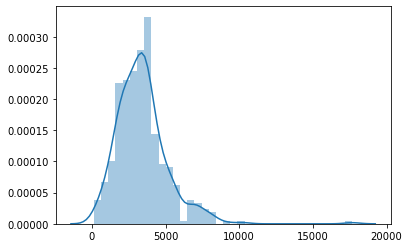

In [202]:
import seaborn as sns

sns.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [203]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(data['clean_text_new'])

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,000,03,04,06366,10,100,1000,1001,105,1079302who,...,young,youyou,yrs,zenreach,zero,zeus,zf,zillow,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [204]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [205]:
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data['clean_text_new']) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,,0,3,8,ability,able,analyze,apply,architecture,autodesk,...,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99re look,you\xe2\x80\x99re ready,you\xe2\x80\x99ve,you\xe2\x80\x99ve work,youyou,yrs,|,||
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.056014,0.0,0.0,0.098595,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.199917,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
dtm.shape

(426, 10940)

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [207]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [208]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.29771124, 1.29964839, 1.32744985, 1.33177199]]),
 array([[  0, 115, 274, 403, 199]], dtype=int64))

In [209]:
data['clean_text_new'][0][:500]

'job requirements: conceptual understanding in machine learning models like nai\\xc2\\xa8ve bayes, k-means, svm, apriori, linear/ logistic regression, neural, random forests, decision trees, k-nn along with hands-on experience in at least 2 of themintermediate to expert level coding skills in python/r. (ability to write functions, clean and efficient data manipulation are mandatory for this role)exposure to packages like numpy, scipy, pandas, matplotlib etc in python or ggplot2, dplyr, tidyr in rab'

In [210]:
data['clean_text_new'][274][:500]

'general description: assist researchers and software developers on projects bridging the gap between research and analytics by providing data-driven solutions across several policy areas.work with research and analytics staff in development of streamlined protocols through gathering requirements.assist team with schema, business rules and configuration testing processes.support development efforts with standardized protocols to manipulate information captured in a fixed format to usable data, us'

In [211]:
my_ideal_job = [ """
We are looking for a Data Scientist who will support our product, sales, leadership and marketing teams with insights gained from analyzing company data. The ideal candidate is adept at using large data sets to find opportunities for product and process optimization and using models to test the effectiveness of different courses of action. They must have strong experience using a variety of data mining/data analysis methods, using a variety of data tools, building and implementing models, using/creating algorithms and creating/running simulations. They must have a proven ability to drive business results with their data-based insights. They must be comfortable working with a wide range of stakeholders and functional teams. The right candidate will have a passion for discovering solutions hidden in large data sets and working with stakeholders to improve business outcomes."""]


In [212]:
new = tfidf.transform(my_ideal_job)
new

<1x10940 sparse matrix of type '<class 'numpy.float64'>'
	with 112 stored elements in Compressed Sparse Row format>

In [213]:
nn.kneighbors(new.todense())

(array([[1.00928642, 1.04496521, 1.22042108, 1.31844686, 1.3194257 ]]),
 array([[327, 347, 215, 331, 216]], dtype=int64))

In [214]:
data['clean_text_new'][327]

"if you\\xe2\\x80\\x99re ready to innovate and help lead the development for hewlett packard enterprise\\xe2\\x80\\x99s (hpe) analytics platform, come join us now! you will be part of an organization that is revolutionizing reporting solutions and architecting a data and analytics landscape that is simplified, modern, flexible and will ultimately enable hpe on its transformation journey and beyond.job overview: we are looking for a data scientist who will support our product, sales, leadership and marketing teams with insights gained from analyzing company data. the ideal candidate is adept at using large data sets to find opportunities for product and process optimization and using models to test the effectiveness of different courses of action. they must have strong experience using a variety of data mining/data analysis methods, using a variety of data tools, building and implementing models, using/creating algorithms and creating/running simulations. they must have a proven ability

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 